In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from utils import *
import cv2

# 1. Load in image

In [3]:
mat_contents = scipy.io.loadmat(r'.\matlab_files\20252001_US_image_data.mat')
#print ("Matrix Contents: ", mat_contents)
raw_img = mat_contents['mid_sag_img_data']
print ("Image Data: ", raw_img.shape)
img_data = raw_img.copy()

Image Data:  (209, 230)


Raw image

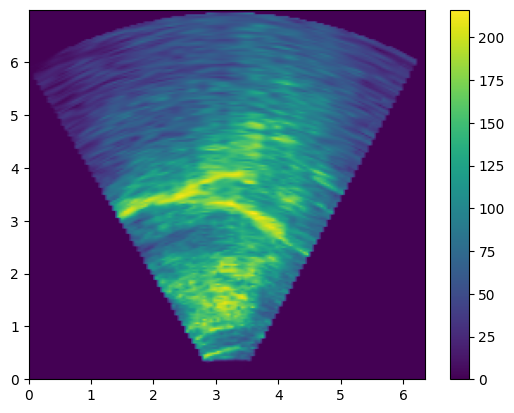

In [4]:
# Display the image
newscale=0.03056709
us_H, us_W = (img_data.shape[0]-1)*newscale, (img_data.shape[1]-1)*newscale
plt.imshow(np.flip(np.flip(raw_img, axis=0), axis=1), extent=(0, us_H, 0, us_W), aspect='auto')
plt.colorbar()
plt.show()

# 2. Smooth + Threshold

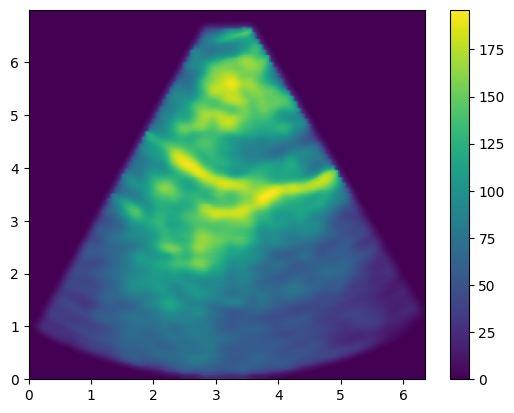

In [38]:
# Apply smoothing
args_bf = {'type': 'bilateral_filter', 'd': 9, 'sigmaColor': 75, 'sigmaSpace': 75}
args_nlm = {'type': 'nl_means', 'h': 10, 'templateWindowSize': 7, 'searchWindowSize': 21}
smoothed = smooth(img_data, args_bf)
plt.imshow(smoothed, extent=(0, us_H, 0, us_W), aspect='auto')
plt.colorbar()
plt.show()

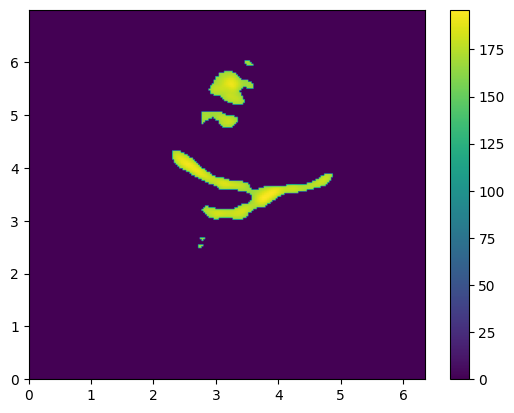

In [51]:
# Naive thresholding
# threshold = np.percentile(smoothed, 87)  # Adjust this percentile to isolate yellow regions
threshold = 165
thresholded = np.where(smoothed > threshold, smoothed, 0)
# Display the image
plt.imshow(thresholded, extent=(0, us_H, 0, us_W), aspect='auto')
plt.colorbar()
plt.show()

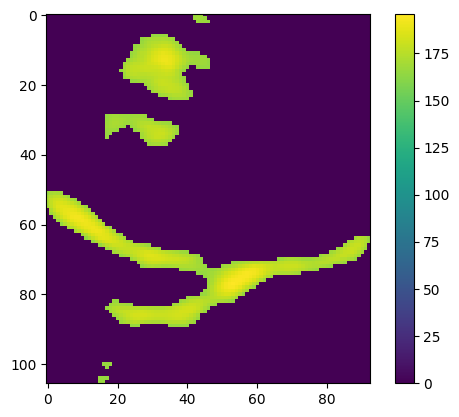

In [47]:
cropped = crop(thresholded)
# Display the image

plt.imshow(cropped)
plt.colorbar()
plt.show()

tried adaptive thresholding, doesn't really work well

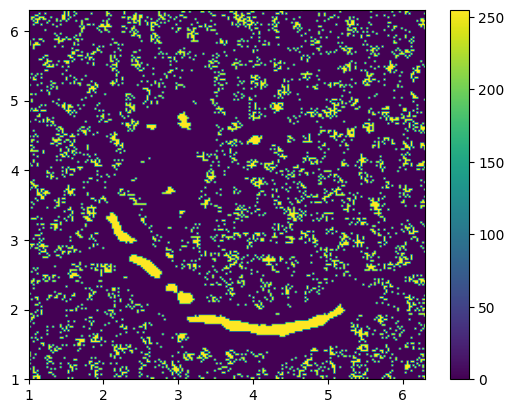

In [9]:
# Adaptive thresholding
threshold = 150
thresholded = np.where(smoothed > threshold, smoothed, 0)
thresholded = thresholded.astype(np.uint8)
smoothed = smoothed.astype(np.uint8)
thresholded = cv2.adaptiveThreshold(
    thresholded,               # Source image
    maxValue=255,        # Maximum value to assign to pixels exceeding the threshold
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,  # Adaptive method
    thresholdType=cv2.THRESH_BINARY,            # Type of thresholding
    blockSize=11,        # Size of the local region
    C=-5                  # Constant subtracted from the calculated threshold
)
smoothed = smoothed.astype(np.float64)
thresholded = thresholded.astype(np.float64)
# Display the image
newC=[206, 206, 206]
newscale=[0.0306, 0.0306, 0.0306]
plt.imshow(thresholded, extent=(1, newC[0]*newscale[0], 1, newC[1]*newscale[1]), aspect='auto')
plt.colorbar()
plt.show()

# MRI SCAN

[445 445  29]
[0.04933945 0.04933945 0.04933945]


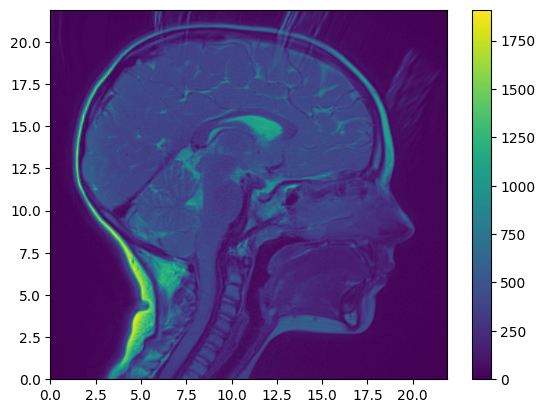

In [61]:
mri_mat_contents = scipy.io.loadmat(r'.\matlab_files\20252001_MRI_image_data.mat')
mid_slice_img_data = mri_mat_contents['mid_slice_img_data']
newMRIC = mri_mat_contents['newMRIC'].flatten()  # Make sure you're using the right variable
newscale_mri = mri_mat_contents['newscale'].flatten()  # Use a different variable to avoid confusion
mid_slice_img_data = np.flip(np.flip(mid_slice_img_data, axis=1), axis=0)
print(newMRIC)
print(newscale_mri)
mri_H, mri_W = (newMRIC[0]-1)*newscale_mri[0], (newMRIC[1]-1)*newscale_mri[1]
plt.imshow(mid_slice_img_data, extent=(0, mri_H, 0, mri_W), aspect='auto')
plt.colorbar()
plt.show()

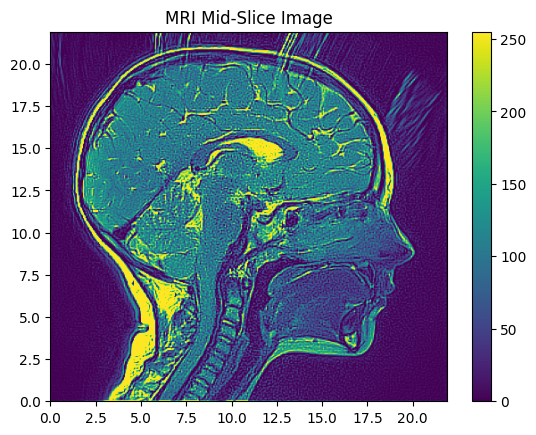

In [62]:
mid_slice_img_data *= 255/np.max(mid_slice_img_data)
mid_slice_img_data = sharpen(mid_slice_img_data)
alpha, beta = 2, 0
mid_slice_img_data = np.clip(alpha * mid_slice_img_data + beta, 0, 255)
plt.imshow(mid_slice_img_data, extent=(0, mri_H, 0, mri_W), aspect='auto')
plt.colorbar()
plt.title('MRI Mid-Slice Image')
plt.show()

In [12]:
mid_slice_img_data *= 255/np.max(mid_slice_img_data)
_, mid_slice_img_data = cv2.threshold(mid_slice_img_data, 15, 255, cv2.THRESH_TOZERO)
print(mid_slice_img_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
print(mid_slice_img_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print(newMRIC[0]*newscale_mri[0])
print(newMRIC[1]*newscale_mri[1])

25.523516803344794
23.934028331759247


In [15]:
from utils import *